In [21]:
# import libraries
import pandas as pd
from sklearn import tree
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
iris = datasets.load_iris()

iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# create pandas df and add target ids
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris["target"]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Exploratory Data Analysis (EDA)

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


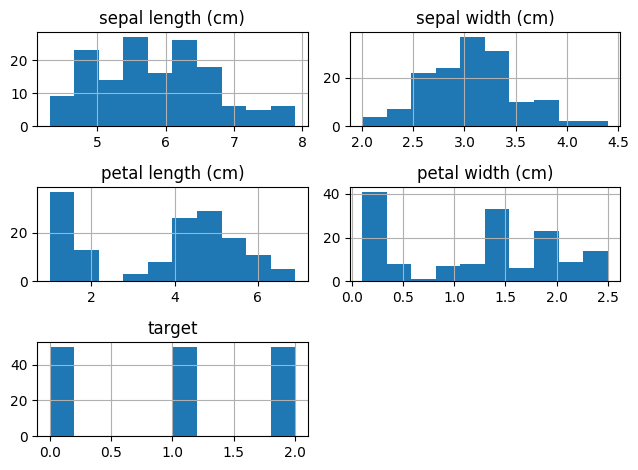

In [19]:
df.hist(bins=10)
plt.tight_layout()

In [25]:
# create new column with species name
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

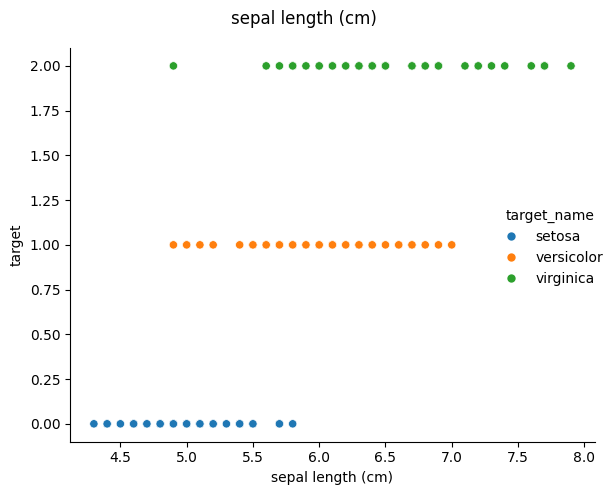

In [28]:
col = "sepal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
plt.suptitle(col)
plt.tight_layout()

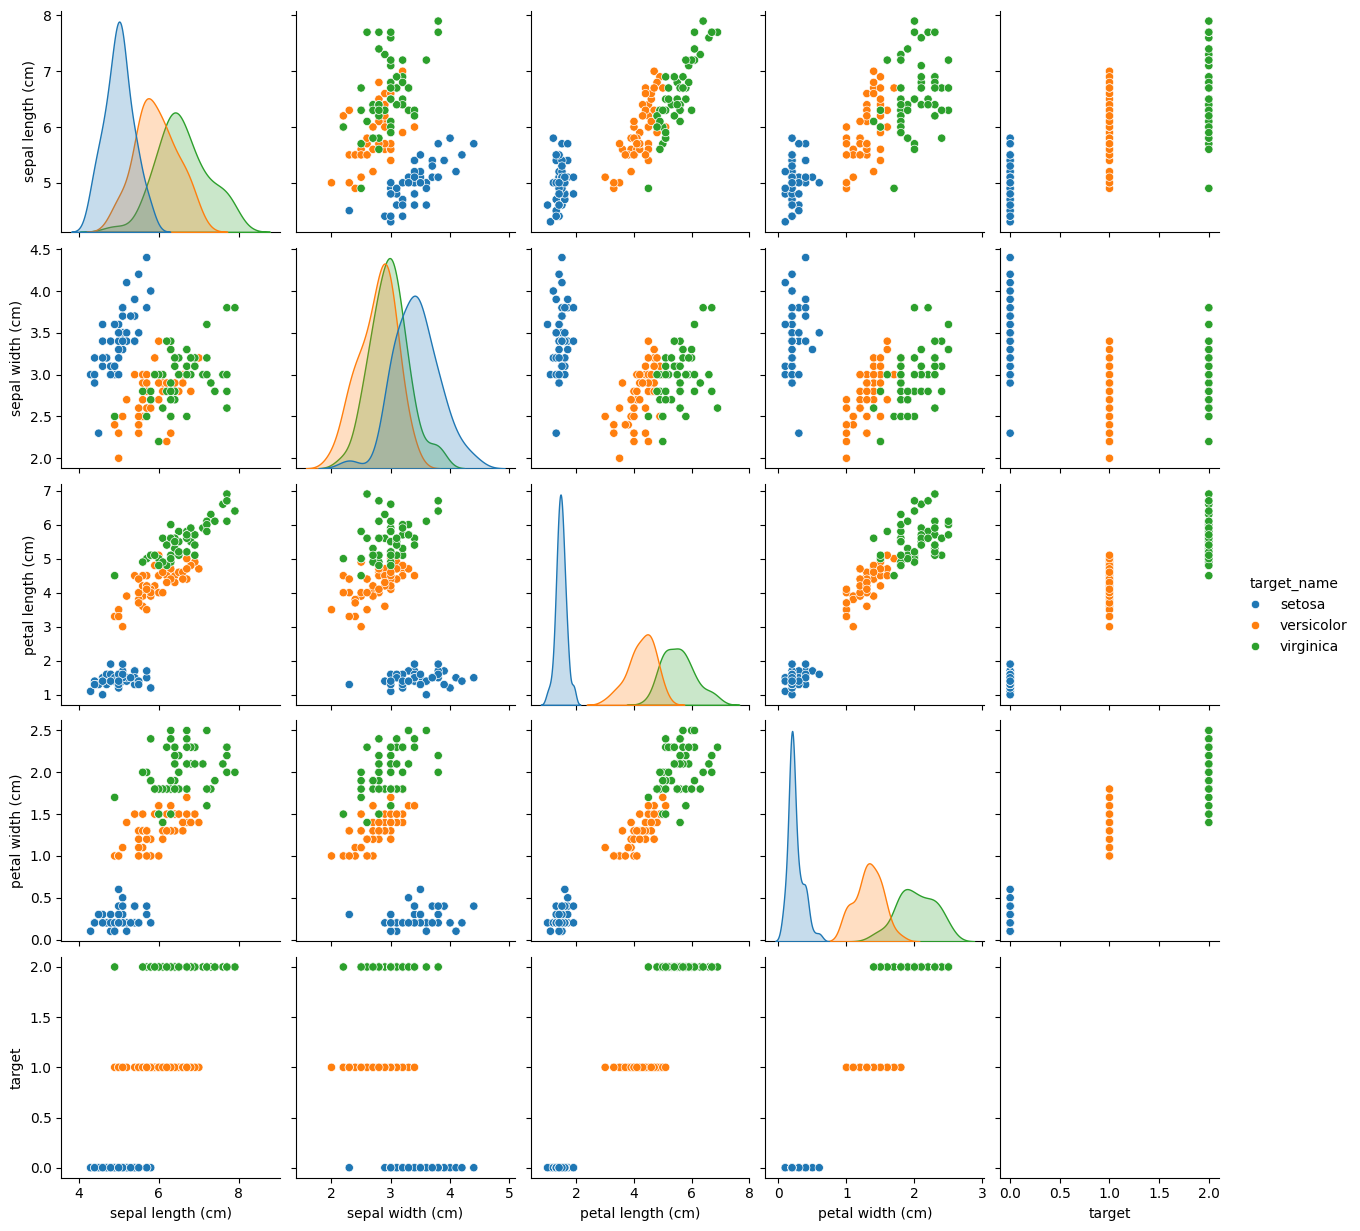

In [30]:
sns.pairplot(df, hue="target_name")

NEW CSV from here

In [53]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
df = pd.read_csv(r"~\Downloads\videolist_search50_2025_11_26-15_00_56.csv")
print(f"In the read document, there are {df.shape[0]} rows and {df.shape[1]} columns")

In the read document, there are 50 rows and 29 columns


In [54]:
"""
formatting headers
"""
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())

['position', 'channelid', 'channeltitle', 'videoid', 'publishedat', 'publishedatsql', 'videotitle', 'videodescription', 'tags', 'videocategoryid', 'videocategorylabel', 'topiccategories', 'duration', 'durationsec', 'dimension', 'definition', 'caption', 'defaultlanguage', 'defaultlaudiolanguage', 'thumbnail_maxres', 'licensedcontent', 'locationdescription', 'latitude', 'longitude', 'viewcount', 'likecount', 'dislikecount', 'favoritecount', 'commentcount']


In [55]:
"""
deleting unnecessesary columns
"""

df_dropped = df.drop(columns=['position', 'channelid', 'videoid', 'publishedatsql', 'videodescription', 'tags', 'videocategoryid', 'videocategorylabel', 
                   'topiccategories', 'dimension', 'definition', 'caption', 'defaultlanguage', 'thumbnail_maxres', 'licensedcontent', 'locationdescription', 'latitude', 
                   'longitude', 'favoritecount', "dislikecount", "commentcount", "durationsec"]) #the last 2 are only deleted for NOW because linear regression!!
df = df_dropped
df = df.drop(0)


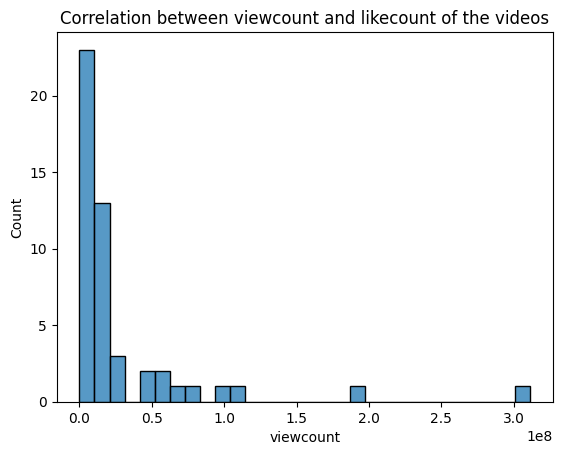

In [56]:
# ANALYSIS
df.describe()
plt.title("Correlation between viewcount and likecount of the videos")
sns.histplot(df["viewcount"])
plt.show()

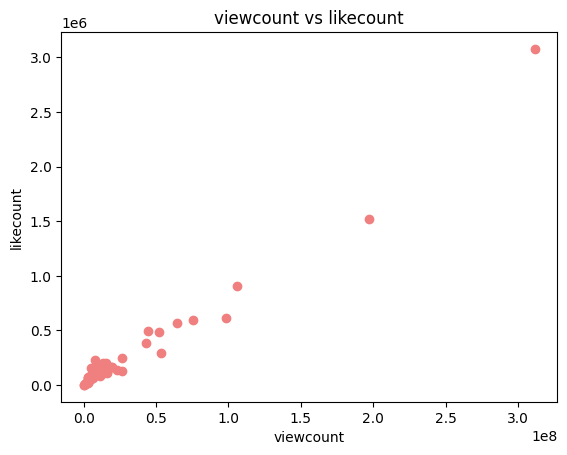

In [57]:
# Relationship between viewcount and likecount
plt.scatter(df['viewcount'], df['likecount'], color = 'lightcoral')
plt.title('viewcount vs likecount')
plt.xlabel('viewcount')
plt.ylabel('likecount')
plt.box(True)
plt.show()

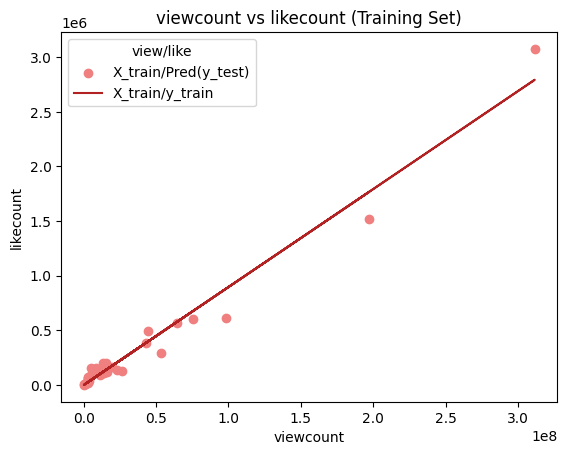

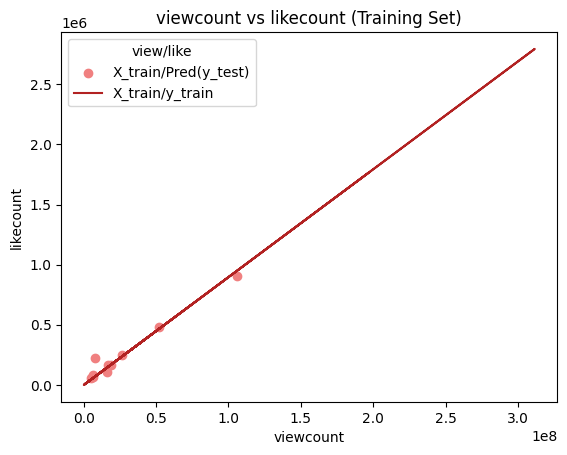

In [96]:
# split dataset into dependent and independent variables

X = df.iloc[:, 5:6] #independent
y = df.iloc[:, 6:] #dependent



# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train


# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('viewcount vs likecount (Training Set)')
plt.xlabel("viewcount")
plt.ylabel('likecount')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'view/like', loc='best', facecolor='white')
plt.box(True)
plt.show()

# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('viewcount vs likecount (Training Set)')
plt.xlabel("viewcount")
plt.ylabel('likecount')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'view/like', loc='best', facecolor='white')
plt.box(True)
plt.show()

